<a href="https://colab.research.google.com/github/5237-mests/Customer_Experience_Analytics_for_Fintech_Apps/blob/task-2/notebooks/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import dependencies
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#sentiment analysis
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#keyword Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#visuals
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

In [5]:
# Load dashen review data
boa_df = pd.read_csv('../data/cleaned_boa_bank_reviews.csv')


In [6]:
boa_df

,review,rating,date,bank,source
0,it's not working,3,2025-06-05,Bank of Abysinia,Google Play
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Abysinia,Google Play
2,exceptional,5,2025-06-03,Bank of Abysinia,Google Play
3,BoA Mobile good bank,5,2025-06-02,Bank of Abysinia,Google Play
4,this is worest app 24/7 loading,1,2025-06-01,Bank of Abysinia,Google Play
...,...,...,...,...,...
995,I don't have words for your great work.. Reall...,5,2024-02-03,Bank of Abysinia,Google Play
996,Nice,5,2024-02-03,Bank of Abysinia,Google Play
997,A massive improvement from the previous app. M...,5,2024-02-03,Bank of Abysinia,Google Play
998,Good,5,2024-02-03,Bank of Abysinia,Google Play


### Preprocessing the Data

Steps:


* Clean text: Remove punctuation, special characters, convert to lowercase.
*  Tokenize: Split text into words.
*  Remove stop words: Eliminate common words (e.g., "the," "and").
*  Lemmatize: Reduce words to base form (e.g., "running" → "run").

In [7]:
# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
boa_df['processed_review'] = boa_df['review'].apply(preprocess_text)

In [8]:
boa_df

,review,rating,date,bank,source,processed_review
0,it's not working,3,2025-06-05,Bank of Abysinia,Google Play,working
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Abysinia,Google Play,hello facing problem boa mobile app every time...
2,exceptional,5,2025-06-03,Bank of Abysinia,Google Play,exceptional
3,BoA Mobile good bank,5,2025-06-02,Bank of Abysinia,Google Play,boa mobile good bank
4,this is worest app 24/7 loading,1,2025-06-01,Bank of Abysinia,Google Play,worest app loading
...,...,...,...,...,...,...
995,I don't have words for your great work.. Reall...,5,2024-02-03,Bank of Abysinia,Google Play,word great work really good like screenshots f...
996,Nice,5,2024-02-03,Bank of Abysinia,Google Play,nice
997,A massive improvement from the previous app. M...,5,2024-02-03,Bank of Abysinia,Google Play,massive improvement previous app modern actual...
998,Good,5,2024-02-03,Bank of Abysinia,Google Play,good


### Sentiment Analysis with TextBlob

Description: TextBlob provides a straightforward way to classify sentiments based on polarity scores.

In [9]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
boa_df['sentiment'] =boa_df['processed_review'].apply(get_sentiment)

# Display sentiment distribution
print(boa_df['sentiment'].value_counts())

sentiment
positive    459
neutral     337
negative    204
Name: count, dtype: int64


In [10]:
boa_df

,review,rating,date,bank,source,processed_review,sentiment
0,it's not working,3,2025-06-05,Bank of Abysinia,Google Play,working,neutral
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Abysinia,Google Play,hello facing problem boa mobile app every time...,positive
2,exceptional,5,2025-06-03,Bank of Abysinia,Google Play,exceptional,positive
3,BoA Mobile good bank,5,2025-06-02,Bank of Abysinia,Google Play,boa mobile good bank,positive
4,this is worest app 24/7 loading,1,2025-06-01,Bank of Abysinia,Google Play,worest app loading,neutral
...,...,...,...,...,...,...,...
995,I don't have words for your great work.. Reall...,5,2024-02-03,Bank of Abysinia,Google Play,word great work really good like screenshots f...,positive
996,Nice,5,2024-02-03,Bank of Abysinia,Google Play,nice,positive
997,A massive improvement from the previous app. M...,5,2024-02-03,Bank of Abysinia,Google Play,massive improvement previous app modern actual...,positive
998,Good,5,2024-02-03,Bank of Abysinia,Google Play,good,positive


### Sentiment Analysis with VADER
Description: VADER is tailored for short texts like reviews, accounting for sentiment intensity and informal language.

In [12]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] > 0.05:
        return 'positive'
    elif scores['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis
boa_df['vader_sentiment'] = boa_df['review'].apply(get_vader_sentiment)

# Display sentiment distribution
print(boa_df['vader_sentiment'].value_counts())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mesfin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


vader_sentiment
positive    444
neutral     312
negative    244
Name: count, dtype: int64


In [13]:
boa_df

,review,rating,date,bank,source,processed_review,sentiment,vader_sentiment
0,it's not working,3,2025-06-05,Bank of Abysinia,Google Play,working,neutral,neutral
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Abysinia,Google Play,hello facing problem boa mobile app every time...,positive,negative
2,exceptional,5,2025-06-03,Bank of Abysinia,Google Play,exceptional,positive,neutral
3,BoA Mobile good bank,5,2025-06-02,Bank of Abysinia,Google Play,boa mobile good bank,positive,positive
4,this is worest app 24/7 loading,1,2025-06-01,Bank of Abysinia,Google Play,worest app loading,neutral,neutral
...,...,...,...,...,...,...,...,...
995,I don't have words for your great work.. Reall...,5,2024-02-03,Bank of Abysinia,Google Play,word great work really good like screenshots f...,positive,positive
996,Nice,5,2024-02-03,Bank of Abysinia,Google Play,nice,positive,positive
997,A massive improvement from the previous app. M...,5,2024-02-03,Bank of Abysinia,Google Play,massive improvement previous app modern actual...,positive,positive
998,Good,5,2024-02-03,Bank of Abysinia,Google Play,good,positive,positive


# Advanced Sentiment Analysis with Machine Learning

Description: Machine learning models like Naive Bayes improve accuracy by training on labeled data.

**Steps**:
* Use star ratings as labels (e.g., 4-5 stars = positive, 1-2 stars = negative).
* Extract features using TF-IDF.
* Train and evaluate a classifier.

In [14]:
# Create labels based on ratings
boa_df['label'] = boa_df['rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# Vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(boa_df['processed_review'])
y = boa_df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.79


Keyword Extraction with TF-IDF





Description: TF-IDF identifies words that are important in specific reviews relative to the entire dataset.

In [15]:
# Vectorize the dataset
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(boa_df['processed_review'])

# Get top keywords
keywords = vectorizer.get_feature_names_out()
print("Top Keywords:", keywords)

Top Keywords: ['able' 'abyssinia' 'account' 'also' 'always' 'android' 'annoying' 'app'
 'application' 'apps' 'bad' 'bank' 'banking' 'best' 'better' 'birr' 'boa'
 'bug' 'ca' 'cbe' 'could' 'crash' 'crashing' 'customer' 'day' 'developer'
 'easy' 'error' 'ethiopia' 'even' 'ever' 'every' 'excellent' 'experience'
 'fast' 'feature' 'fix' 'functional' 'get' 'give' 'good' 'great' 'issue'
 'keep' 'know' 'like' 'load' 'login' 'long' 'make' 'many' 'mobile' 'money'
 'much' 'need' 'never' 'new' 'nice' 'ok' 'one' 'open' 'option' 'otp'
 'phone' 'please' 'poor' 'previous' 'problem' 'properly' 'really' 'say'
 'seen' 'service' 'since' 'slow' 'sometimes' 'still' 'system' 'take'
 'time' 'transaction' 'transfer' 'try' 'turn' 'update' 'updated' 'use'
 'used' 'useless' 'user' 'using' 'version' 'worest' 'work' 'working'
 'worst' 'would' 'wow' 'በጣም' 'ነው']


# Combining Sentiment Analysis and Keyword Extraction

Description: Analyze keywords in positive vs. negative reviews to understand user preferences and issues.

In [16]:
# Filter positive and negative reviews
positive_reviews = boa_df[boa_df['sentiment'] == 'positive']['processed_review']
negative_reviews =boa_df[boa_df['sentiment'] == 'negative']['processed_review']

# Extract keywords from positive reviews
vectorizer_pos = TfidfVectorizer(max_features=10)
X_pos = vectorizer_pos.fit_transform(positive_reviews)
print("Top Keywords in Positive Reviews:", vectorizer_pos.get_feature_names_out())

# Extract keywords from negative reviews
vectorizer_neg = TfidfVectorizer(max_features=10)
X_neg = vectorizer_neg.fit_transform(negative_reviews)
print("Top Keywords in Negative Reviews:", vectorizer_neg.get_feature_names_out())

Top Keywords in Positive Reviews: ['app' 'bank' 'banking' 'best' 'boa' 'good' 'mobile' 'nice' 'use' 'work']
Top Keywords in Negative Reviews: ['app' 'bank' 'banking' 'ever' 'mobile' 'please' 'time' 'update' 'work'
 'worst']


# Visualizing the Results

**Visualizations**:
* Bar Chart: Show the distribution of positive, negative, and neutral sentiments.
* Word Cloud: Visualize frequent keywords in positive and negative reviews.

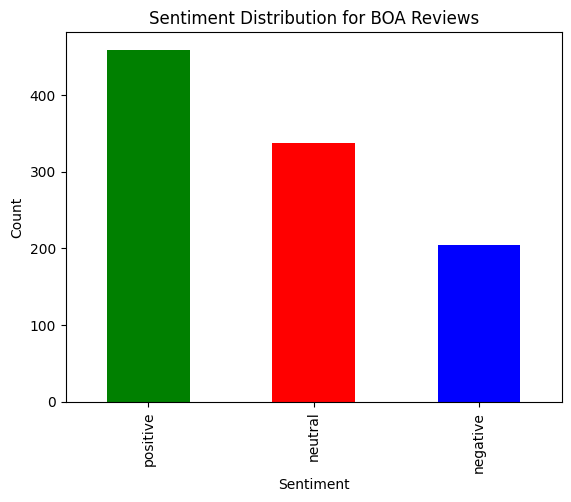

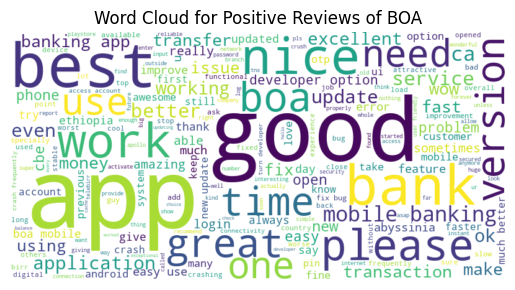

In [17]:
# Sentiment distribution
boa_df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution for BOA Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Word cloud for positive reviews
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews of BOA')
plt.show()

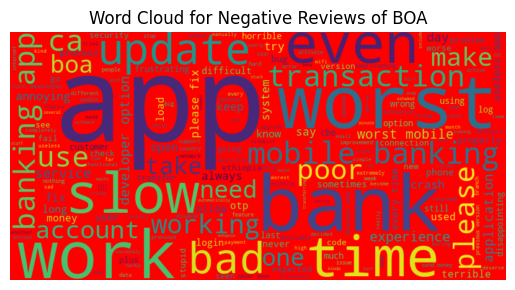

In [18]:
negative_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews of BOA')
plt.show()